# Perceptron Model with Iris Dataset


This notebook to train on how to build and train a Perceptron model using the Iris dataset. The Iris dataset is a classic dataset used in machine learning and statistics, consisting of 150 samples of iris flowers with four features each (sepal length, sepal width, petal length, and petal width) and three classes (Iris-setosa, Iris-versicolor, and Iris-virginica).

In this notebook, we will do the following:
* Load and prepare the Iris dataset.
* Split the dataset into training and testing sets.
* Standardize the features.
* Train a Perceptron model.
* Evaluate the model's performance.


# Import libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


In [2]:
#Load Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [5]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [6]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [8]:
df.shape


(150, 5)

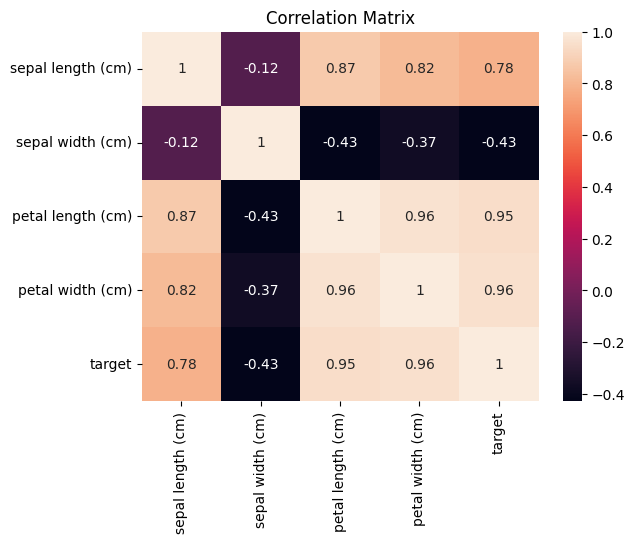

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Split the dataset into training and testing sets

In [10]:
#now i will split data into X_traine and y_traine
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features

In [14]:
#now i will scale the datatset and i will do he scaling on X_trine and x_test
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

print(X_train)
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
81                 5.5               2.4                3.7               1.0
133                6.3               2.8                5.1               1.5
137                6.4               3.1                5.5               1.8
75                 6.6               3.0                4.4               1.4
109                7.2               3.6                6.1               2.5
..                 ...               ...                ...               ...
71                 6.1               2.8                4.0               1.3
106                4.9               2.5                4.5               1.7
14                 5.8               4.0                1.2               0.2
92                 5.8               2.6                4.0               1.2
102                7.1               3.0                5.9               2.1

[105 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

\# Initialize and train the Perceptron model

In [19]:
model = Perceptron(max_iter=500, random_state=42)

#taine the model
model.fit(X_train, y_train)

Perceptron(max_iter=500, random_state=42)

# Predict the labels of the test set

In [21]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


# Calculate the accuracy of the model

In [24]:
acc_model = accuracy_score(y_test, y_pred)
print(f'Perceptron Model Accuracy: {acc_model * 100:.2f}%')

Perceptron Model Accuracy: 46.67%


# Display the first few predictions

In [26]:
print("First 5 predicted labels:", y_pred[:11])

First 5 predicted labels: [0 0 2 0 0 0 0 0 1 0 0]


In [28]:
print("First 5 actual labels:", y_test[:15])

First 5 actual labels: 73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
Name: target, dtype: int64


In [31]:
#now i will disply full report about the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        19
           1       0.50      0.08      0.13        13
           2       1.00      0.08      0.14        13

    accuracy                           0.47        45
   macro avg       0.65      0.38      0.30        45
weighted avg       0.62      0.47      0.34        45

